<a href="https://colab.research.google.com/github/SeokcheonMoon/study_data_analytics/blob/main/docs/pandas/09_pandas_usefuls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [ ]:
# 샘플 데이터 생성 (이상치 포함)
df_data = pd.DataFrame({
    'Age_20_50': np.random.randint(20, 50, size=100).tolist()  # 대부분 20세에서 50세 사이이나, 몇몇 이상치 포함
    , 'Age_outlier': np.random.randint(20, 50, size=95).tolist() + [9, 75, 80, 85, 90]  # 대부분 20세에서 50세 사이이나, 몇몇 이상치 포함
})
df_data[:2]

,Age_20_50,Age_outlier
0,48,45
1,40,31


In [ ]:
df_data.shape

(100, 2)

### without outliers

<Axes: xlabel='Age_20_50', ylabel='count'>

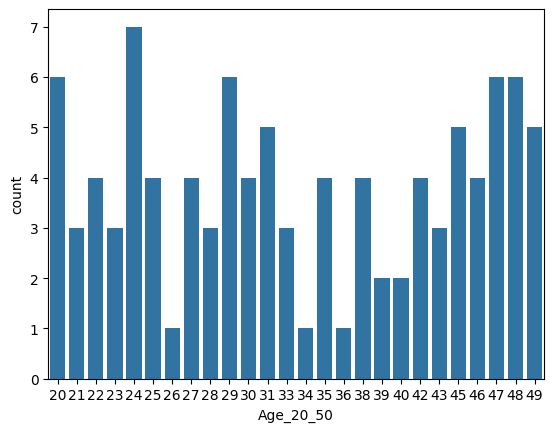

In [ ]:
sns.countplot(data=df_data, x="Age_20_50")

In [ ]:
bins = [19,29,39,49]
labels = ["20-29","30-39","40-49"]
df_data["Age_20_50_category"] = pd.cut(x = df_data["Age_20_50"],bins = bins,labels= labels)
df_data[:10]

,Age_20_50,Age_outlier,Age_20_50_category
0,48,45,40-49
1,40,31,40-49
2,46,47,40-49
3,47,49,40-49
4,36,41,30-39
5,33,43,30-39
6,29,31,20-29
7,21,33,20-29
8,30,29,30-39
9,27,40,20-29


In [ ]:
df_data["Age_20_50_category"].value_counts()

20-29    41
40-49    35
30-39    24
Name: Age_20_50_category, dtype: int64

In [ ]:
df_data["Age_20_50"].value_counts().sort_index()[:10].sum()

41

### with outliers

In [ ]:
bins = [0,19,29,39,49,100]
labels = ["<20","20-29","30-39","40-49","50+"]
df_data["Age_outlier_100"] = pd.cut(x = df_data["Age_outlier"],bins = bins,labels= labels)
df_data["Age_outlier_100"].value_counts()

20-29    34
40-49    32
30-39    29
50+       4
<20       1
Name: Age_outlier_100, dtype: int64